In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#load the dataset
file_path = '/content/drive/My Drive/TestData/Data Analyst - Level02 - Test Data.xlsx'
testdata = pd.read_excel(file_path)

# Display the first few rows of the dataframe
testdata.head()

,Flight Number,Departure Airport,Destination Airport,Departure Time,Arrival Time,Flight Duration (min),Passenger Count,Revenue (USD)
0,KA001,Nairobi,New York,2024-01-01 08:00:00,2024-01-01 16:00:00,480,250,50000
1,KA002,New York,Nairobi,2024-01-02 10:00:00,2024-01-02 22:00:00,720,300,55000
2,KA003,Nairobi,London,2024-01-03 06:00:00,2024-01-03 14:00:00,480,200,40000
3,KA004,London,Nairobi,2024-01-04 09:00:00,2024-01-04 21:00:00,720,280,52000
4,KA005,Nairobi,Dubai,2024-01-05 12:00:00,2024-01-05 18:00:00,360,150,30000


The dataset contains the following columns:

1. Flight Number - Unique identifier for each flight.
2. Departure Airport - The airport from which the flight departed.
3. Destination Airport - The airport to which the flight was headed.
4. Departure Time - The scheduled departure time of the flight.
5. Arrival Time - The scheduled arrival time of the flight.
6. Flight Duration - The duration of the flight (in minutes).
7. Passenger Count - The number of passengers on the flight.
8. Revenue - The revenue generated from the flight (in USD).



Next, I'll perform the following steps:

*   Check the data types and look for any initial issues with the data.
*   Check for any missing values.
*   Summarize the dataset to get an overview of the numerical fields.
*   Explore the distribution of the categorical variables.



In [ ]:
# Check the data types and look for any issues with the data
data_types = testdata.dtypes

data_types

Flight Number                    object
Departure Airport                object
Destination Airport              object
Departure Time           datetime64[ns]
Arrival Time             datetime64[ns]
Flight Duration (min)             int64
Passenger Count                   int64
Revenue (USD)                     int64
dtype: object

In [ ]:
# Check for any missing values
missing_values = testdata.isnull().sum()

missing_values

Flight Number            0
Departure Airport        0
Destination Airport      0
Departure Time           0
Arrival Time             0
Flight Duration (min)    0
Passenger Count          0
Revenue (USD)            0
dtype: int64

In [ ]:
# Summarize the dataset for numerical fields
columns_to_remove = ['Departure Time', 'Arrival Time']

testdata_filtered = testdata.drop(columns=columns_to_remove)

summary_statistics = testdata_filtered.describe()

summary_statistics

,Flight Duration (min),Passenger Count,Revenue (USD)
count,153.000000,153.000000,153.000000
mean,601.718954,293.921569,59784.313725
std,139.049331,63.008305,36218.623658
min,23.000000,150.000000,30000.000000
25%,480.000000,250.000000,50000.000000
50%,660.000000,300.000000,58000.000000
75%,720.000000,340.000000,66000.000000
max,720.000000,430.000000,480000.000000


Here's a summary of the dataset's properties:

*   The data types for each column are appropriate, with Flight Duration, Passenger Count and Revenue being integers, Departure Time and Arrival Time being datetime, and the rest being objects (which typically denote strings in pandas)
*   There are no missing values in any of the columns.
*   There are 153 records in total.
*   The Flight Duration column has values approximately ranging from 23 min to 720 min with a mean Flight Duration of approximately 601 min









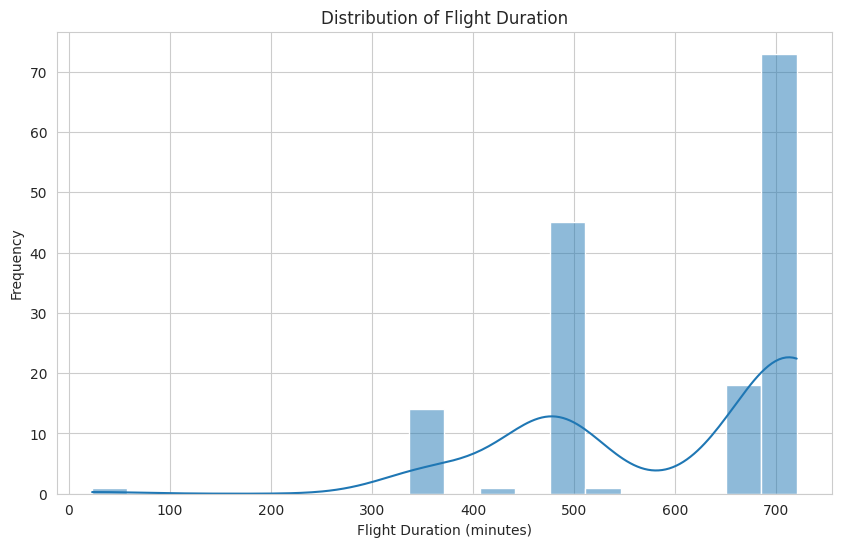

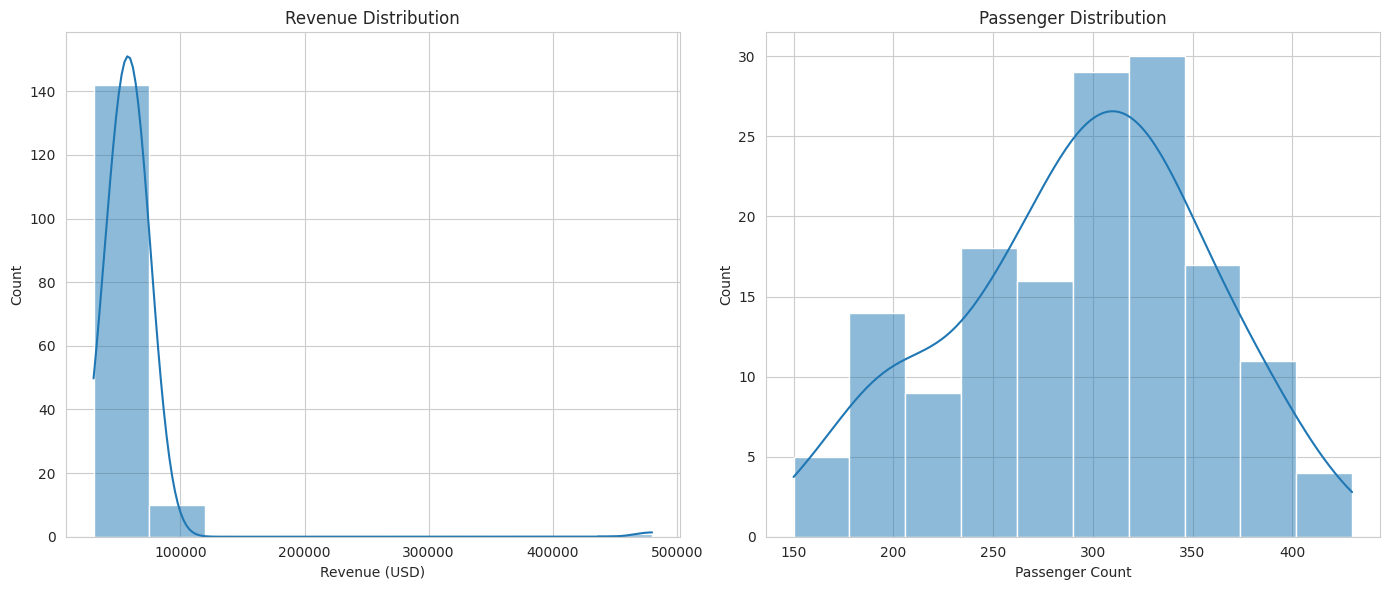

In [ ]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

#plot distribution of 'Flight Duration' using histograms
plt.figure(figsize=(10, 6))
sns.histplot(testdata['Flight Duration (min)'],bins=20, kde=True)
plt.title('Distribution of Flight Duration')
plt.xlabel('Flight Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

# Plot distribution of the Revenue column
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(testdata['Revenue (USD)'], bins=10, kde=True)
plt.title('Revenue Distribution')

# Plot distribution of the Passenger Count column
plt.subplot(1, 2, 2)
sns.histplot(testdata['Passenger Count'], bins=10, kde=True)
plt.title('Passenger Distribution')

plt.tight_layout()
plt.show()

The distribution plots provide the following insights:


*   The passenger distribution is positively skewed which could mean that there are specific flights that experience unusually high demand, resulting in a few flights with significantly more passengers than average. This might occur during holidays, peak travel seasons, or on popular routes.
*  The Flight Duration disttribution is likely left-skewed, meaning that there are more flights with longer durations
*   The revenue distribution for the column "Revenue (USD)" includes an outlier of $480,000.





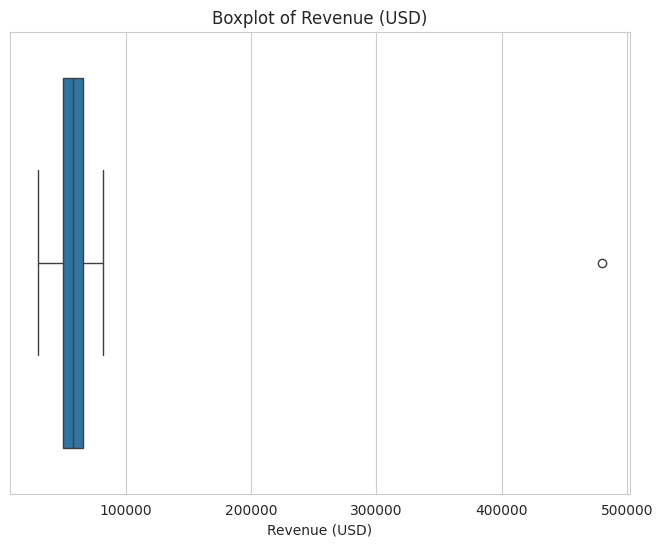

In [ ]:
# Plot boxplot of 'Revenue (USD)' to visualize outliers# Plot boxplot of 'Revenue (USD)'
plt.figure(figsize=(8, 6))
sns.boxplot(x=testdata['Revenue (USD)'], showfliers=True)  # Set showfliers=True to display outliers
plt.title('Boxplot of Revenue (USD)')
plt.xlabel('Revenue (USD)')
plt.show()



Decided to exclude the outlier above for further investigation since it represents the only flight from Nairobi to Sydney, and there's limited information available to assess its validity.


<ipython-input-8-0e0f76a8fc6f>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=cleaned_data, x=column, palette='viridis')
<ipython-input-8-0e0f76a8fc6f>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=cleaned_data, x=column, palette='viridis')


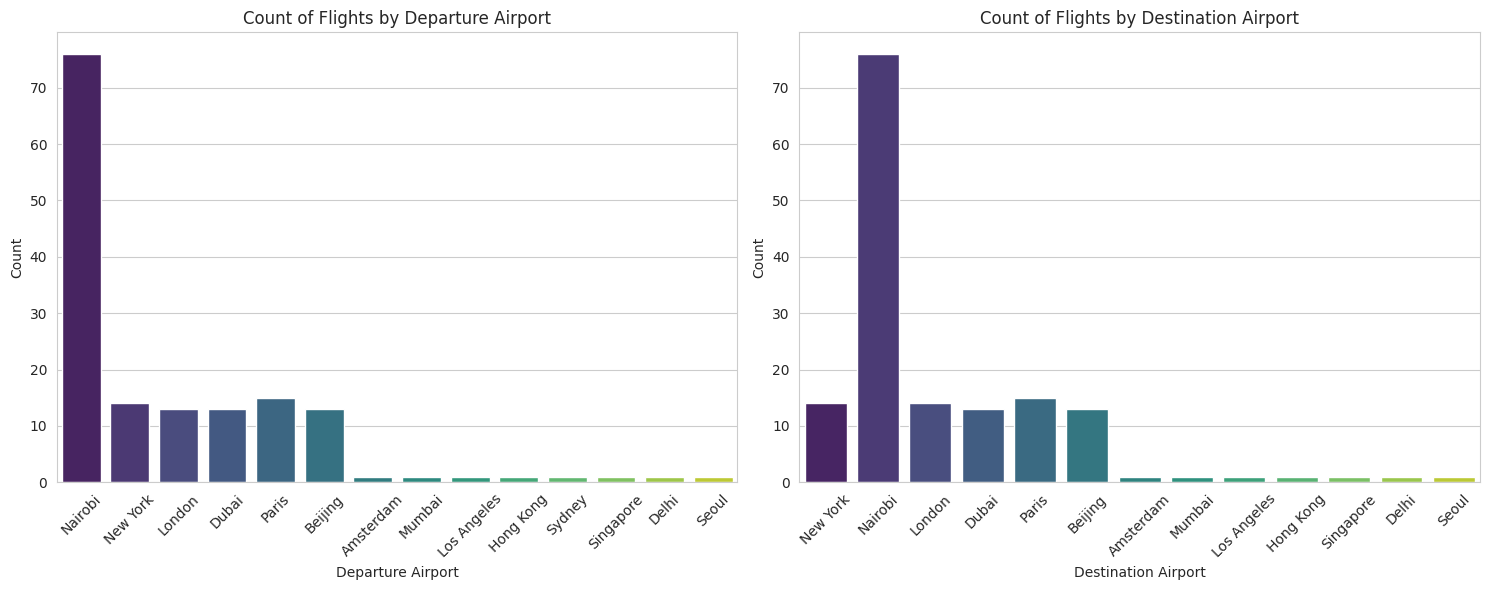

In [ ]:
# Remove rows where 'Revenue (USD)' is equal to the outlier value
cleaned_data = testdata[testdata['Revenue (USD)'] != 480000]

categorical_columns = ['Departure Airport', 'Destination Airport']
plt.figure(figsize=(15, 6))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(1, 2, i)
    sns.countplot(data=cleaned_data, x=column, palette='viridis')
    plt.title(f'Count of Flights by {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The count plots reveal the following about the categorical variables:

*   Nairobi has the highest number of flights for both departure and destination airports.





<ipython-input-13-cea99907bade>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cleaned_data, x='Destination Airport', y='Revenue (USD)', palette='viridis')


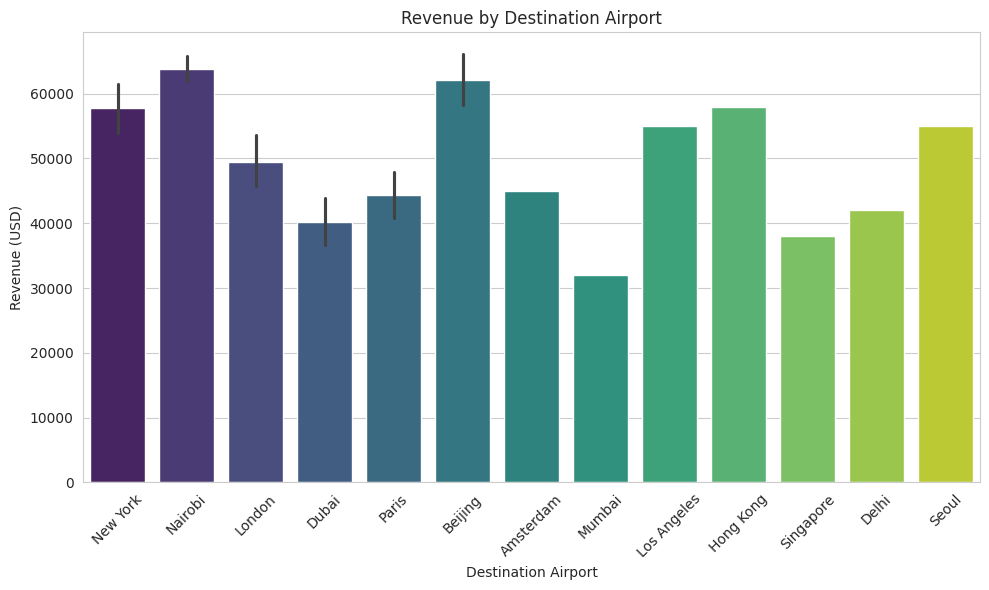

In [ ]:
# Plot 'Destination Airport' against 'Revenue (USD)'
plt.figure(figsize=(10, 6))
sns.barplot(data=cleaned_data, x='Destination Airport', y='Revenue (USD)', palette='viridis')
plt.title('Revenue by Destination Airport')
plt.xlabel('Destination Airport')
plt.ylabel('Revenue (USD)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

The revenue distribution plot highlights Nairobi as the destination with the highest revenue and Mumbai as the destination with the lowest revenue

In [ ]:
# Group data by destination airport and calculate total passenger count and revenue
destination_stats = cleaned_data.groupby('Destination Airport').agg({'Passenger Count': 'sum', 'Revenue (USD)': 'sum'}).reset_index()

# Calculate correlation coefficient
correlation = destination_stats['Passenger Count'].corr(destination_stats['Revenue (USD)'])

print("Correlation coefficient between Passenger Count and Revenue:", correlation)

Correlation coefficient between Passenger Count and Revenue: 0.9999578929644694


The analysis reveals an exceptionally strong positive correlation (correlation coefficient ≈ 0.9999) between passenger count and revenue. This suggests that increasing passenger numbers directly correlates with higher revenue generation.
